In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

In [2]:
PARSED_FILE = './parsed.json'
with open(PARSED_FILE, 'r') as json_file:
    data = json.load(json_file)

# Create a DataFrame from the list of dictionaries
df = pd.json_normalize(data)
df

,workload,discards,foundbug,strategy,mutant,passed,property,time
0,RBT,0,True,bespokeGenerator,miscolor_balRight,25,prop_DeleteDelete,2.43
1,RBT,0,True,bespokeGenerator,miscolor_balRight,525,prop_DeleteDelete,23.31
2,RBT,0,True,bespokeGenerator,miscolor_balRight,342,prop_DeleteDelete,16.22
3,RBT,0,True,bespokeGenerator,miscolor_balRight,7078,prop_DeleteDelete,392.50
4,RBT,0,True,bespokeGenerator,miscolor_balRight,142,prop_DeleteDelete,10.17
...,...,...,...,...,...,...,...,...
2615,BST,0,True,bespokeGenerator,union_7,0,prop_UnionModel,0.13
2616,BST,0,True,bespokeGenerator,union_7,0,prop_UnionModel,0.55
2617,BST,0,True,bespokeGenerator,union_7,0,prop_UnionModel,0.27
2618,BST,0,True,bespokeGenerator,union_7,0,prop_UnionModel,0.13


In [5]:
df["gen"] = df['workload'] + df['strategy']

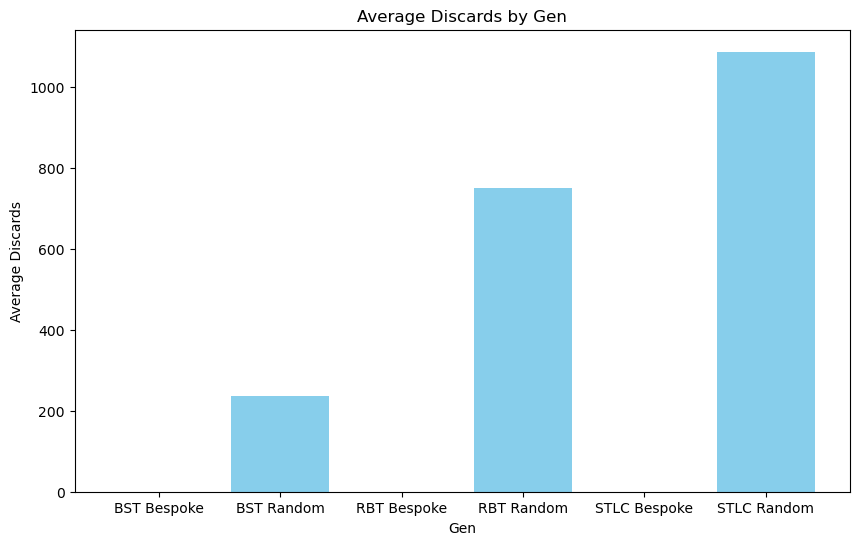

In [8]:
grouped_data = df.groupby('gen')['discards'].mean().reset_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['gen'], grouped_data['discards'], color='skyblue')
plt.xlabel('Gen')

custom_labels = ['BST Bespoke', 'BST Random', 'RBT Bespoke', 'RBT Random', 'STLC Bespoke', 'STLC Random']  # Replace these with your desired labels
plt.xticks(grouped_data['gen'], custom_labels)
plt.ylabel('Average Discards')
plt.title('Average Discards by Gen')
plt.show()

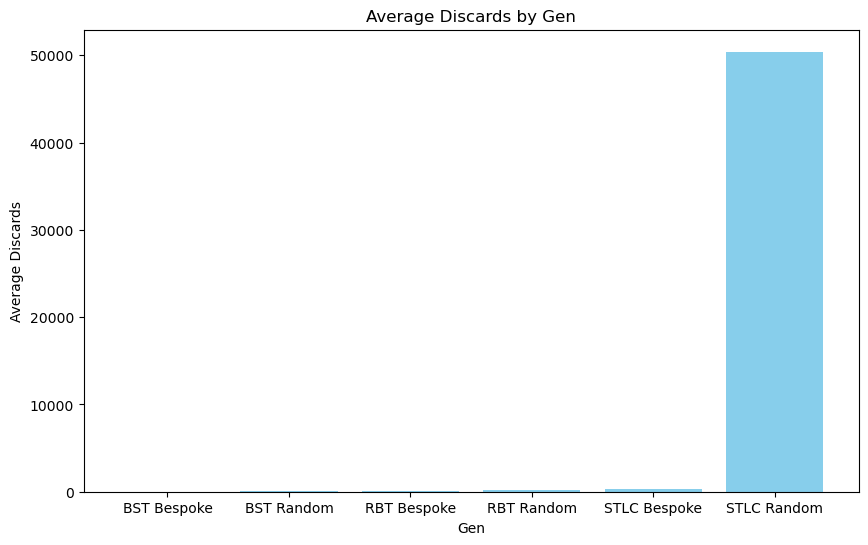

In [9]:
grouped_data = df.groupby('gen')['time'].mean().reset_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['gen'], grouped_data['time'], color='skyblue')
plt.xlabel('Gen')

custom_labels = ['BST Bespoke', 'BST Random', 'RBT Bespoke', 'RBT Random', 'STLC Bespoke', 'STLC Random']  # Replace these with your desired labels
plt.xticks(grouped_data['gen'], custom_labels)
plt.ylabel('Average Runtime')
plt.title('Average Runtime by Gen')
plt.show()